Answer 1. 4 cases are possible. First is the case in which the Refree gives 0 to all of the three players. The other 3 cases are when the refree gives 0 to one of the players and 1 to the other 2. 

It can easily be observed that when the refree gives 0 to all of the three players then in that case, theh players need to return an even number of ones.

When the refree gives 1 to two of the players and 0 to a single player thtat is in the other 3 cases, the players need to return an odd number of ones.

Just for proving purposes, let us assume that when the player return a 0 instead of returning a zero, they are returning -1. This does not change the problem but makes the proof easier as when an even number of ones need to be returned, the product of the retuned bits will be -1 and when an odd number of ones need to be returned, the product of the returned bits need to be +1.

Let us assume that after discussing the strategy, it is decided that if Alice gets 0, she will return bit a<sub>0</sub> and if she gets 1, she will return bit a<sub>1</sub>. Similar is decided for Bob and Charlie. a<sub>0</sub>, a<sub>1</sub> etc. are -1 or 1. 

Therefore, if all of the three players are given 0, then a<sub>0</sub>b<sub>0</sub>c<sub>0</sub>=-1(as even number of ones need to be returned)
for the other three cases

a<sub>1</sub>b<sub>1</sub>c<sub>0</sub>=1

a<sub>1</sub>b<sub>0</sub>c<sub>1</sub>=1

a<sub>0</sub>b<sub>1</sub>c<sub>1</sub>=1

(as odd number of ones need to be returned)

Multiplying the above three equations, we get

a<sub>0</sub>$^2$a<sub>1</sub>$^2$b<sub>0</sub>$^2$b<sub>1</sub>$^2$c<sub>0</sub>$^2$c<sub>1</sub>$^2$=-1

This is not possible as LHS is negative but RHS is positive. Thus, no strategy is possible in which all of the 4 cases can be satisfied.

If in every case, all of the three players return 1, then 3 of the 4 cases are satisfied which are the maximum number of cases that can be satisfied using one strategy.
Thus, the best strategy for them is able to win $\frac{3}4^{th}$ of the time and they can not do any better.

Answer 2. If the player gets a 0, the measurement should be perfomed in the $\left| + \right\rangle $ and $\left| - \right\rangle $ basis.
If the player gets a 1, the measurement should be performed in the $\left| +i \right\rangle $ and $\left| -i \right\rangle $ basis.
The strategy always works can be demonstrated by the following circuit.

░           ┌───┐     ┌───┐ ░                           ░ »
q_0: ────────────────░───■────■──┤ X ├──■──┤ X ├─░───────────────────────────░─»
     ┌───┐           ░   │    │  └───┘  │  └───┘ ░           ┌───┐     ┌───┐ ░ »
q_1: ┤ X ├───────────░───┼────┼─────────┼────────░───■────■──┤ X ├──■──┤ X ├─░─»
     ├───┤           ░   │    │         │        ░   │    │  └───┘  │  └───┘ ░ »
q_2: ┤ X ├───────────░───┼────┼─────────┼────────░───┼────┼─────────┼────────░─»
     ├───┤           ░ ┌─┴─┐┌─┴─┐     ┌─┴─┐      ░   │    │         │        ░ »
q_3: ┤ H ├──■────■───░─┤ S ├┤ H ├─────┤ H ├──────░───┼────┼─────────┼────────░─»
     └───┘┌─┴─┐  │   ░ └───┘└───┘     └───┘      ░ ┌─┴─┐┌─┴─┐     ┌─┴─┐      ░ »
q_4: ─────┤ X ├──┼───░───────────────────────────░─┤ S ├┤ H ├─────┤ H ├──────░─»
          └───┘┌─┴─┐ ░                           ░ └───┘└───┘     └───┘      ░ »
q_5: ──────────┤ X ├─░───────────────────────────░───────────────────────────░─»
               └───┘ ░                           ░                           ░ »
c: 3/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                               ░          
«q_0: ──────────────────────────░──────────
«                               ░          
«q_1: ──────────────────────────░──────────
«               ┌───┐     ┌───┐ ░          
«q_2: ──■────■──┤ X ├──■──┤ X ├─░──────────
«       │    │  └───┘  │  └───┘ ░ ┌─┐      
«q_3: ──┼────┼─────────┼────────░─┤M├──────
«       │    │         │        ░ └╥┘┌─┐   
«q_4: ──┼────┼─────────┼────────░──╫─┤M├───
«     ┌─┴─┐┌─┴─┐     ┌─┴─┐      ░  ║ └╥┘┌─┐
«q_5: ┤ S ├┤ H ├─────┤ H ├──────░──╫──╫─┤M├
«     └───┘└───┘     └───┘      ░  ║  ║ └╥┘
«c: 3/═════════════════════════════╩══╩══╩═
«                                  0  1  2

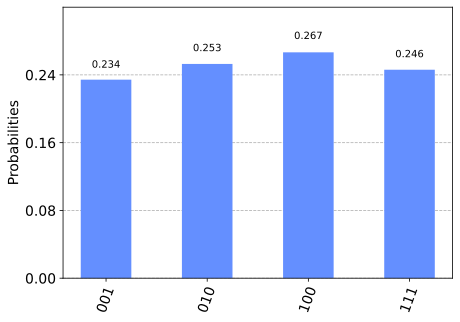

In [3]:
#Answer 2 code
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector
from math import sqrt, pi
from qiskit.visualization import array_to_latex
from qiskit.circuit.library.standard_gates import SGate


csgate = SGate().control(1)


circuit=QuantumCircuit(6,3)
ref='011'#other alternatives are '011', '110', '101' 
#to see the other outcomes value of ref string need to be changed

for i in range(3):
    if ref[i]=='1':
        circuit.x(i)

#preparing the GHZ gate 
circuit.h(3)
circuit.cx(3,4)
circuit.cx(3,5)
circuit.barrier()



for j in range (3):
    circuit.append(csgate,[j,j+3])
    circuit.ch(j,j+3)
    circuit.x(j)
    circuit.ch(j,j+3)
    circuit.x(j)
    circuit.barrier()


for i in range(3):
    circuit.measure(i+3, i)
display(circuit.draw()) 
    
# Creating a Qobj from the circuit for the simulator to run
svsim = Aer.get_backend('statevector_simulator')
test = transpile(circuit, svsim)
qobj = assemble(test)
results = svsim.run(qobj).result()
answer = results.get_counts()
display(plot_histogram(answer))

# all of the probable outcomes are solutions to the problem and Alex, Bob and Charlie win if they perform the measurement and return that as an answer to the refree

#Therefore, this strategy always works